In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

import anndata as ad
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [2]:
adata = ad.read('../data/processed/mus_musculus_preprocessed_all_params.h5ad')

In [3]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

In [4]:
len(adata.var.index)

7439

In [4]:
# param_df = adata.var[['cast_kon', 'cast_koff', 'cast_ksyn']]
# param_df = adata.var[['c57_kon', 'c57_koff', 'c57_ksyn']]
# param_df = adata.var[['total_kon', 'total_koff', 'total_ksyn']]
# param_df = adata.var[['spliced_kon', 'spliced_koff', 'spliced_ksyn']]
# param_df = adata.var[['unspliced_kon', 'unspliced_koff', 'unspliced_ksyn']]
# param_df = adata.var[['total_s_u_kon', 'total_s_u_koff', 'total_s_u_ksyn']]

param_df = adata.var[['total_s_u_kon', 'total_s_u_koff', 'total_s_u_ksyn']]
param_df

,total_s_u_kon,total_s_u_koff,total_s_u_ksyn
Gene,,,
Mrpl15,2.176995,12.495542,2190.929841
4732440D04Rik,0.049667,4.569173,80.359250
Cops5,3.656598,29.409660,11898.416600
Arfgef1,1.756567,184.983916,22803.915975
Tram1,0.001000,8.264970,1.000000
...,...,...,...
Exosc7,1.229338,6.279444,1772.273585
Lars2,0.912919,18.076687,1391.569082
Sacm1l,NaN,NaN,NaN


In [5]:
DR_ES = pd.read_csv('../data/slam_seq.csv', sep=';')
DR_ES.index = DR_ES['Name']

DR_ES = DR_ES[~DR_ES.index.duplicated(keep='first')]

DR_ES = DR_ES.dropna(how='any')

DR_ES['decay'] = np.log(2)/DR_ES['Half-life (h)']
DR_ES

,Chromosome,Start,End,Name,Length,Strand,Half-life (h),k (cpm/h),stderror Half-life,stderror k,Rsquare,decay
Name,,,,,,,,,,,,
0610009O20Rik,chr18,38262373,38262629,0610009O20Rik,256,+,3.951685,0.175405,1.186440,0.075258,0.765899,0.175405
1110004F10Rik,chr7,116104957,116105210,1110004F10Rik,253,+,5.936154,0.116767,1.944206,0.056869,0.822637,0.116767
1110008F13Rik,chr2,156873310,156873562,1110008F13Rik,252,+,5.290184,0.131025,1.118520,0.035131,0.923630,0.131025
1110012L19Rik,chrX,70389160,70389418,1110012L19Rik,258,+,3.079123,0.225112,0.905426,0.093768,0.779368,0.225112
1110038F14Rik,chr15,76950480,76950979,1110038F14Rik,499,+,3.212736,0.215750,0.714446,0.061699,0.894247,0.215750
...,...,...,...,...,...,...,...,...,...,...,...,...
Zswim7,chr11,62267223,62267482,Zswim7,259,-,6.307095,0.109900,2.241834,0.060605,0.735318,0.109900
Zwilch,chr9,64137143,64137395,Zwilch,252,-,4.964903,0.139609,1.657282,0.069951,0.790147,0.139609
Zyg11b,chr4,108229730,108229980,Zyg11b,250,-,1.931063,0.358946,0.474268,0.116857,0.813993,0.358946


In [6]:
common_genes = param_df.index.intersection(DR_ES.index)
common_genes

Index(['Mrpl15', 'Cops5', 'Arfgef1', 'Mcm3', 'Phf3', 'Ptp4a1', 'Zfp451',
       'Ccdc115', 'Fam168b', 'Uggt1',
       ...
       'Dync1li1', 'Cmtm6', 'Osbpl10', 'Acaa1a', 'Eif1b', 'Ctnnb1', 'Trak1',
       'Kif15', 'Exosc7', 'Sacm1l'],
      dtype='object', length=3729)

In [7]:
param_df = param_df.loc[common_genes]
DR_ES = DR_ES.loc[common_genes]

In [8]:
# bf = pd.Series([gene for gene in param_df['cast_kon']], index=param_df.index)
# bf = pd.Series([gene for gene in param_df['c57_kon']], index=param_df.index)
# bf = pd.Series([gene for gene in param_df['total_kon']], index=param_df.index)
# bf = pd.Series([gene for gene in param_df['spliced_kon']], index=param_df.index)
# bf = pd.Series([gene for gene in param_df['unspliced_kon']], index=param_df.index)
# bf = pd.Series([gene for gene in param_df['total_s_u_kon']], index=param_df.index)


bf = pd.Series([gene for gene in param_df['total_s_u_kon']], index=param_df.index)



DR_ES_scRNA = DR_ES.reindex(param_df.index)

decay_ES = DR_ES_scRNA['decay']
decay_ES = decay_ES.replace([np.inf, 0], np.nan).dropna()
decay_ES = decay_ES[~decay_ES.index.duplicated(keep='first')]
decay_ES = decay_ES[decay_ES > 0]
decay_ES = decay_ES.dropna()
decay_ES

Mrpl15     0.145519
Cops5      0.103951
Arfgef1    0.196800
Mcm3       0.171844
Phf3       0.275402
             ...   
Ctnnb1     0.147461
Trak1      0.185720
Kif15      0.175860
Exosc7     0.150974
Sacm1l     0.158300
Name: decay, Length: 3729, dtype: float64

SpearmanrResult(correlation=0.8153309871531657, pvalue=0.0)


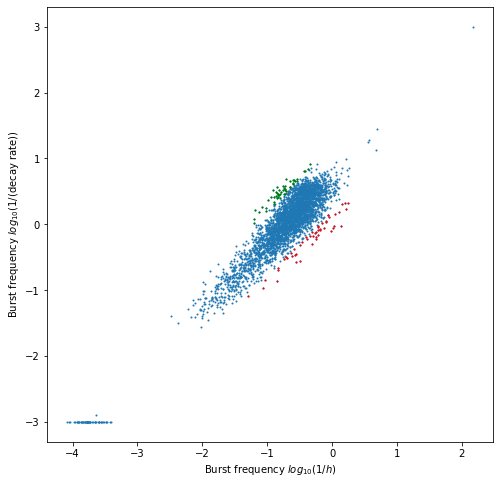

In [9]:
plt.figure(figsize=(8,8))
bf_absolute = np.log10((bf*decay_ES).dropna())
bf_relative = np.log10(bf[decay_ES.index].dropna())
plt.scatter(bf_absolute,bf_relative , s=1)
plt.scatter(bf_absolute[np.argsort(decay_ES[bf_relative.index])[:50]], bf_relative[np.argsort(decay_ES[bf_relative.index])[:50]], s=1, color='green')
plt.scatter(bf_absolute[np.argsort(decay_ES[bf_relative.index])[-50:]], bf_relative[np.argsort(decay_ES[bf_relative.index])[-50:]], s=1, color='red')
print(spearmanr(bf_absolute,bf_relative))
plt.xlabel(r'Burst frequency $log_{10}(1/h)$')
plt.ylabel(r'Burst frequency $log_{10}(1/$(decay rate))')
plt.savefig('figures/Fig1e/Fig1e_total.pdf')
plt.show()

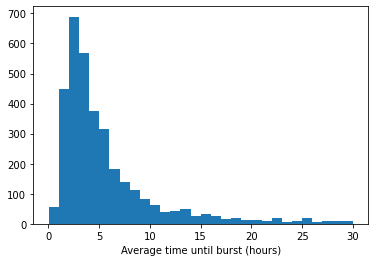

In [10]:
plt.hist(1/10**bf_absolute[1/10**bf_absolute < 30], bins=30)
plt.xlabel('Average time until burst (hours)')
plt.savefig('figures/Fig1f/Fig1f_total.pdf')
plt.show()